### Implementing HDBSCAN to cluster spending habits of accounts

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
import seaborn as sns

In [11]:
spending_data = pd.read_csv('Proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.003603,0.115157,-0.013799,-0.026129,-0.038480,0.124927,0.015093,-0.007146,0.012463,-0.009759,-0.051889,-0.021443,0.046869,-0.142262
1,1002.0,0.000903,0.163846,-0.014562,-0.012116,-0.045537,-0.010689,0.020247,-0.007146,0.079114,0.002583,-0.049655,-0.030313,-0.003582,-0.093094
2,1006.0,-0.000618,-0.046949,0.013436,0.059187,-0.047891,0.073030,-0.037343,-0.007146,0.020539,-0.009759,0.158437,-0.027322,-0.003582,-0.144018
3,1018.0,-0.001904,-0.110578,-0.012793,-0.036169,0.132839,-0.063913,0.017895,-0.007146,-0.014876,-0.009759,0.123151,0.077521,-0.000928,-0.093342
4,1053.0,0.003433,-0.034050,-0.014562,-0.031265,0.151357,-0.005674,0.055473,-0.001133,0.024622,-0.009759,-0.046894,0.034151,-0.003582,-0.122116


Splitting the data into features and targets

In [8]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP and PCA)

(8142, 2)


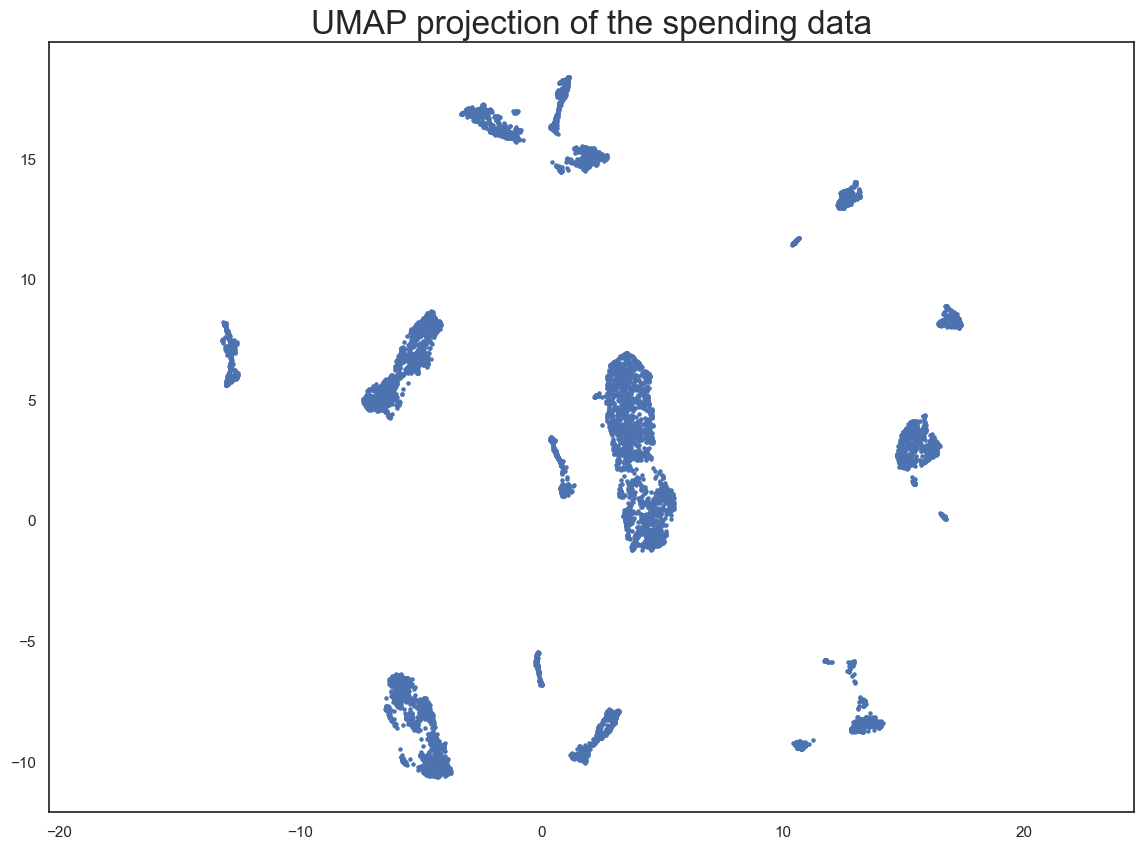

In [22]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP()

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

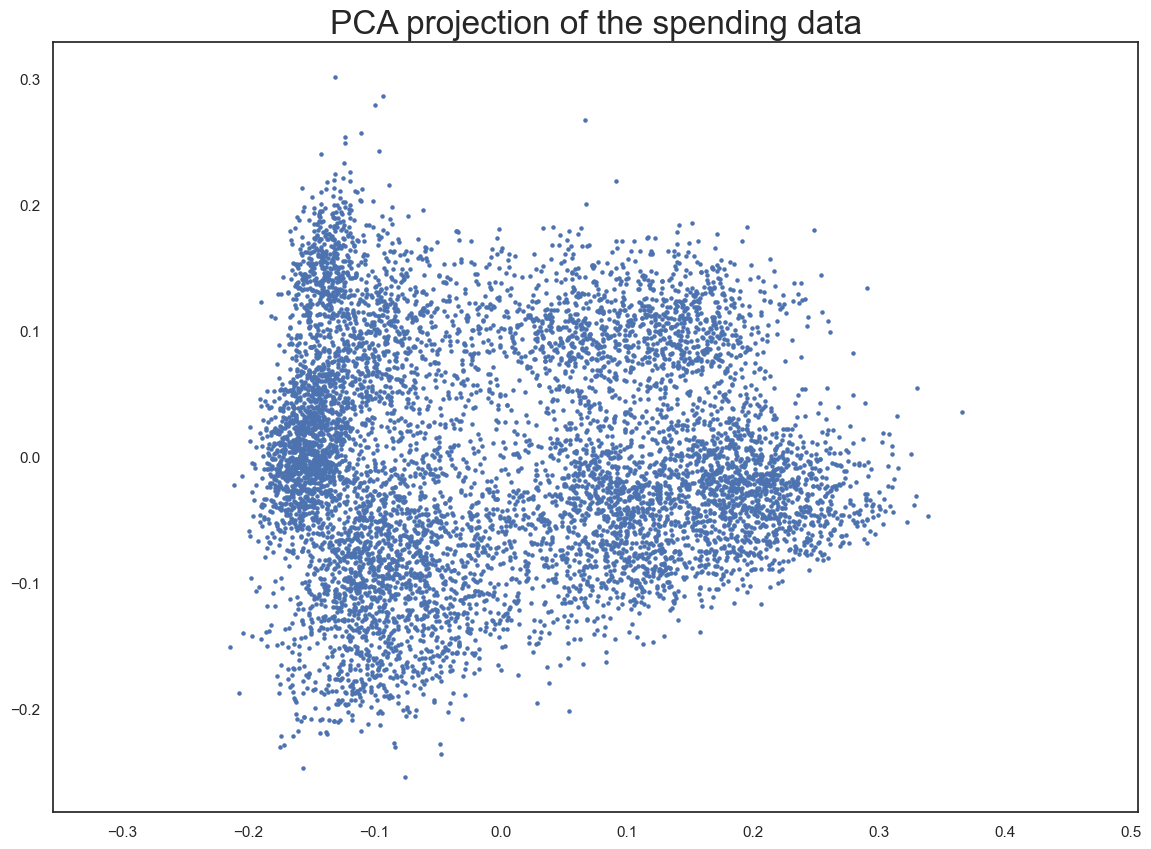

In [25]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

#### Clustering with HDBSCAN on data after UMAP 

In [36]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

In [53]:
spending_data['cluster_label'].value_counts()

cluster_label
4     2326
5     1078
9     1003
10     712
8      574
3      529
0      401
6      322
1      319
7      314
2      308
11     256
Name: count, dtype: int64

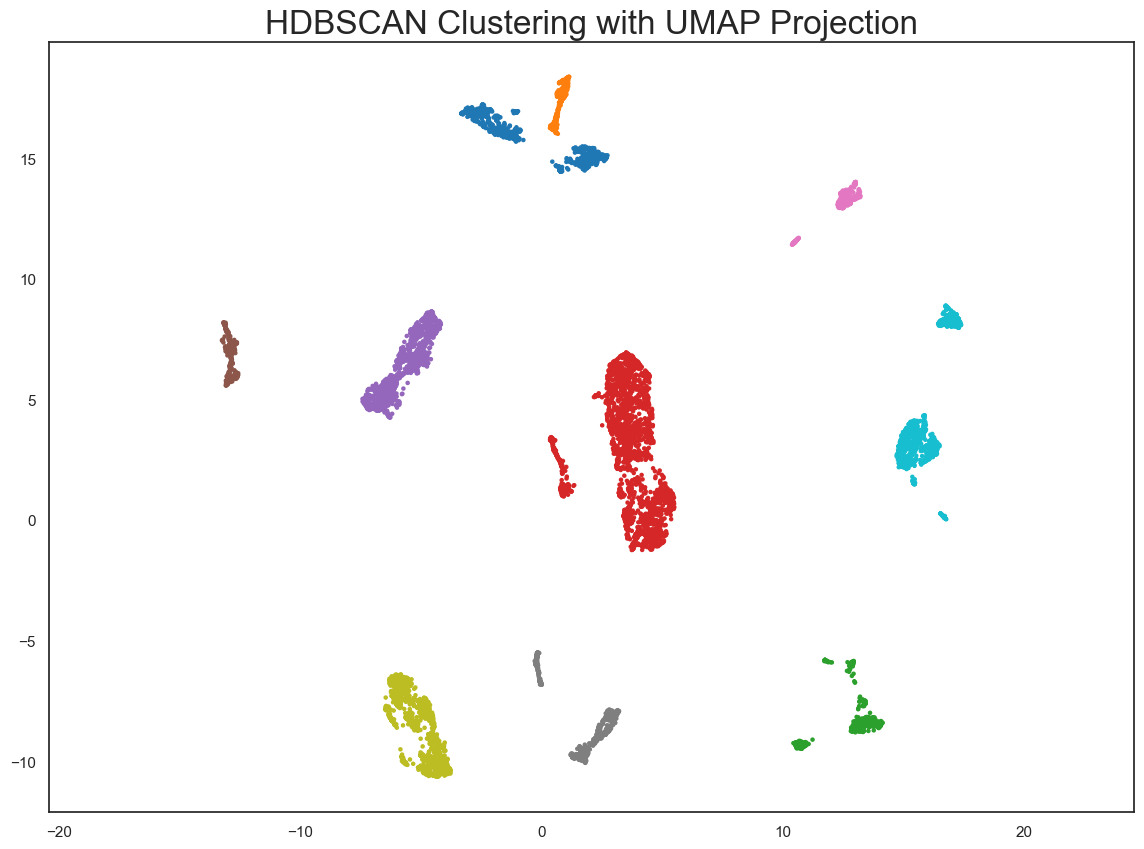

In [58]:
plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=[cmap(label) for label in cluster_labels],  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

#### Plotting accounts within UMAP HDBSCAN clusters

In [91]:
cluster_of_interest = 8

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
46610.0,0.002026,-0.034781,0.014738,0.072651,0.019854,-0.037008,-0.042873,-0.007146,-0.021616,-0.009759,-0.032400,0.015053,0.016697,0.044564,8
61512.0,-0.004095,-0.098967,-0.014562,0.043529,0.067858,0.033762,-0.052288,-0.007146,-0.017736,-0.004577,-0.050094,-0.004093,-0.001786,0.110194,8
75857.0,0.001707,-0.080179,-0.014562,0.045976,0.069055,-0.036745,-0.045471,0.022298,0.031550,-0.009759,-0.046329,-0.013512,-0.003012,0.078982,8
63507.0,-0.000779,-0.147181,-0.013467,0.064425,0.096443,0.044005,-0.046926,-0.007146,0.002593,-0.009759,-0.031700,0.054524,-0.003582,-0.001450,8
88315.0,-0.003100,-0.126682,-0.014562,0.056466,0.044146,0.046439,-0.051583,0.030096,0.008726,-0.009759,-0.048075,0.028260,-0.002708,0.042335,8
59959.0,0.006940,-0.068178,-0.011277,0.028616,0.135717,-0.005729,0.051748,-0.007146,0.002553,-0.009759,-0.027496,0.036090,-0.003582,-0.128499,8


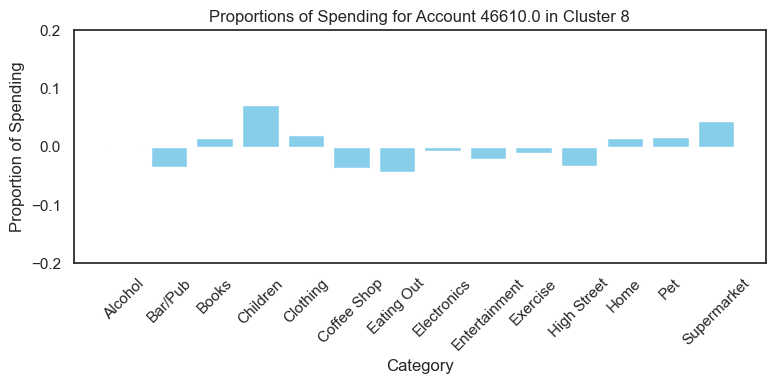

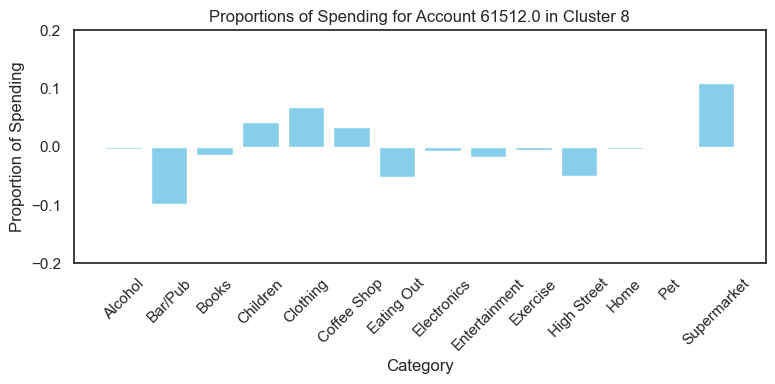

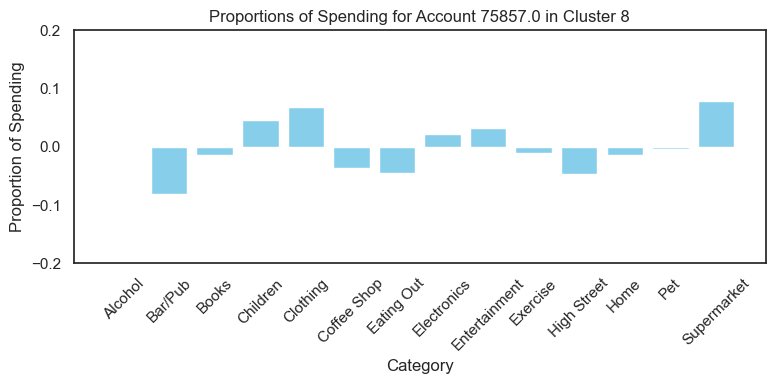

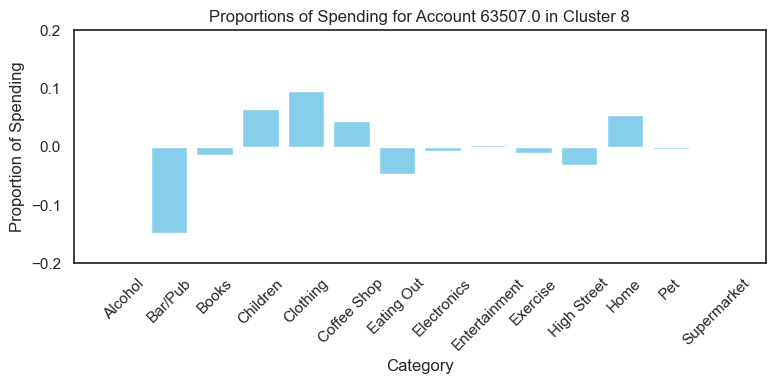

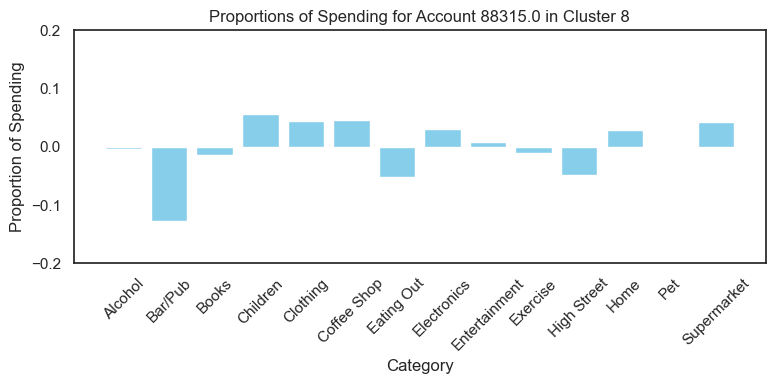

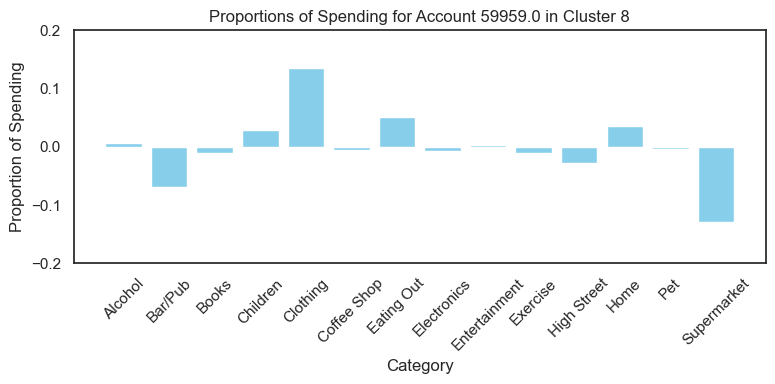

In [92]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [95]:
spending_data['Alcohol'].min()

-0.00455653712913

#### Clustering without UMAP

In [26]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [6]:
spending_data['cluster_label'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

Plotting the proportions for some of the accounts in a cluster

In [10]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [11]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
90408.0,-0.003855,-0.032670,0.009474,-0.030540,-0.052308,0.106377,0.050145,-0.007146,-0.019638,-0.009759,0.132145,-0.030313,-0.002411,-0.109501,1
56105.0,0.004145,-0.068426,-0.013256,-0.041388,-0.020712,0.118010,0.027564,-0.007146,-0.018375,-0.005668,0.160619,-0.030313,-0.003582,-0.101474,1
62562.0,-0.000189,0.008296,-0.014562,0.077421,-0.018870,0.067391,-0.029160,-0.007146,-0.024918,-0.009759,0.103664,-0.018976,-0.003265,-0.129928,1


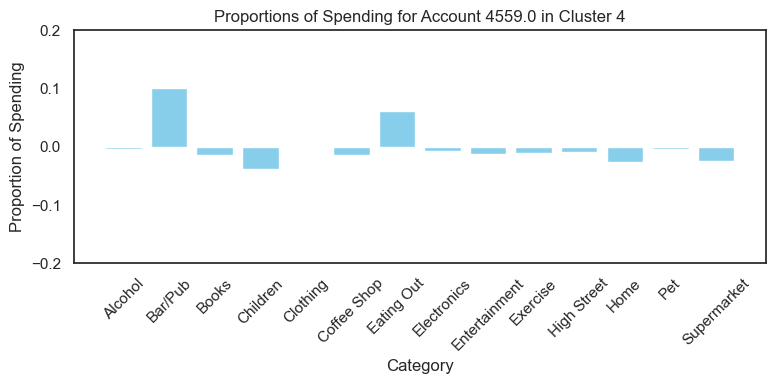

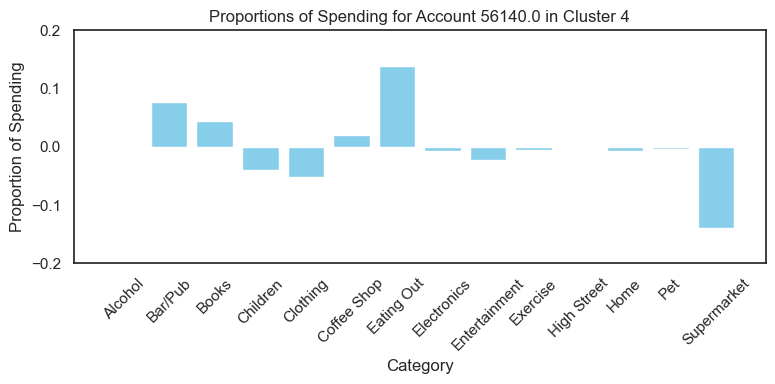

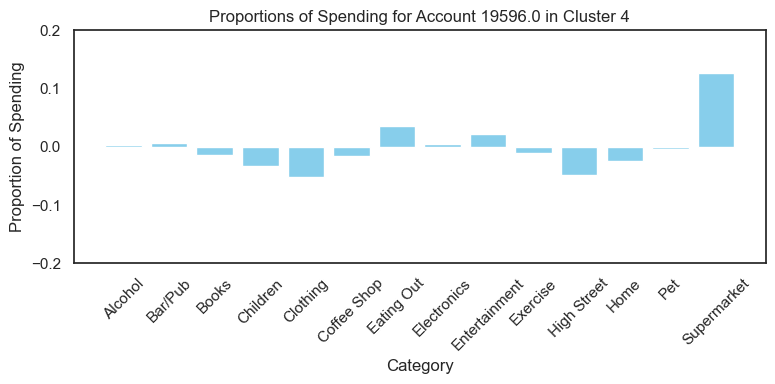

In [62]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

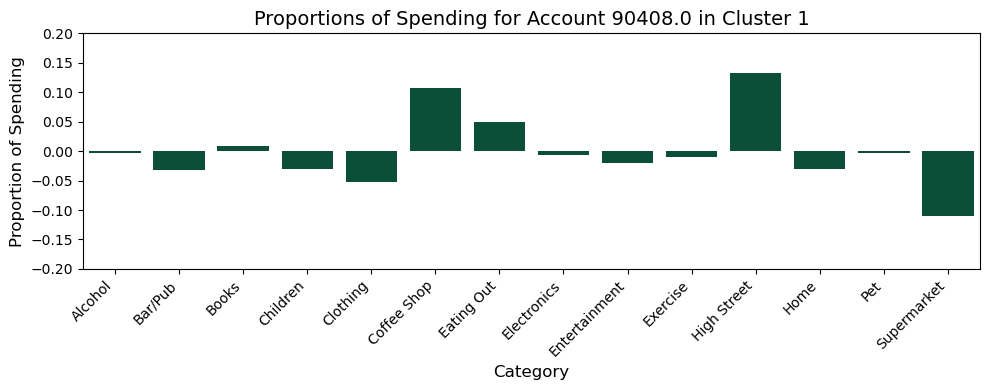

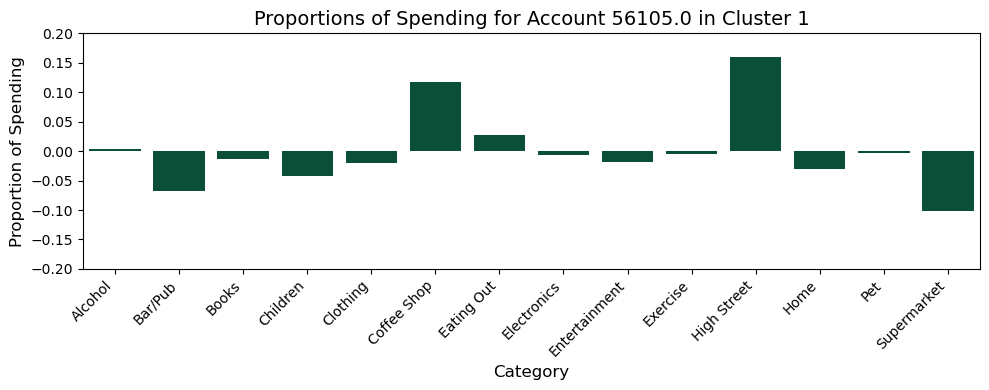

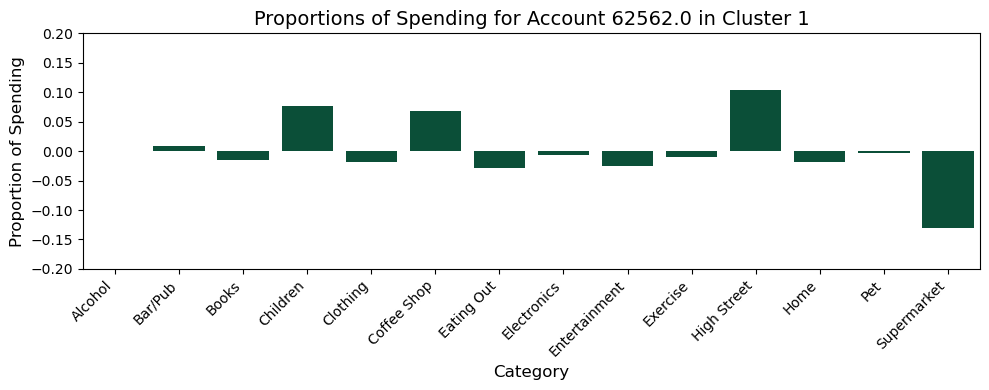

In [20]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [26]:
spending_data['cluster_label'].value_counts()

cluster_label
 0    6292
 3     635
-1     533
 1     412
 2     270
Name: count, dtype: int64